In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from config import username, password, host, port # need config.py file containing this info
import matplotlib.pyplot as plt

In [2]:
# connect to local database
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/EmployeeSQL")
connection = engine.connect()

In [3]:
# Import the Salaries table
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries = salaries.dropna()
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
# Import the Title table
titles = pd.read_sql("SELECT * FROM titles", connection)
titles = titles.dropna()
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
# Import the Title table
employees = pd.read_sql("SELECT * FROM employees", connection)
employees = employees.dropna()
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


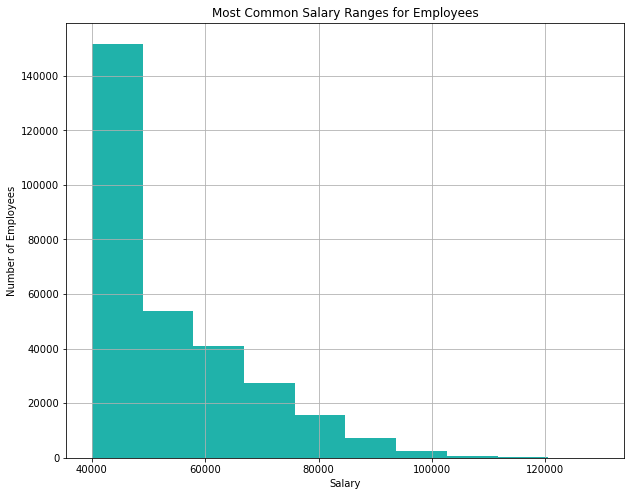

In [6]:
# Create a histogram to visualize the most common salary ranges for employees.
salaries.hist(column = 'salary', color= "lightseagreen", figsize = (10,8))

plt.title("Most Common Salary Ranges for Employees")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.savefig("histogram.png")
plt.show()

In [7]:
# merge salary table and title table
employees_salaries = pd.merge(employees, salaries, how = 'inner', on='emp_no')
employees_salaries.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
# rename "emp_title_id" 
df = employees_salaries.rename(columns={'emp_title_id': 'title_id'})
df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [9]:
# merge df table and title table
df_new = pd.merge(df, titles, how = 'inner', on='title_id')
df_new.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


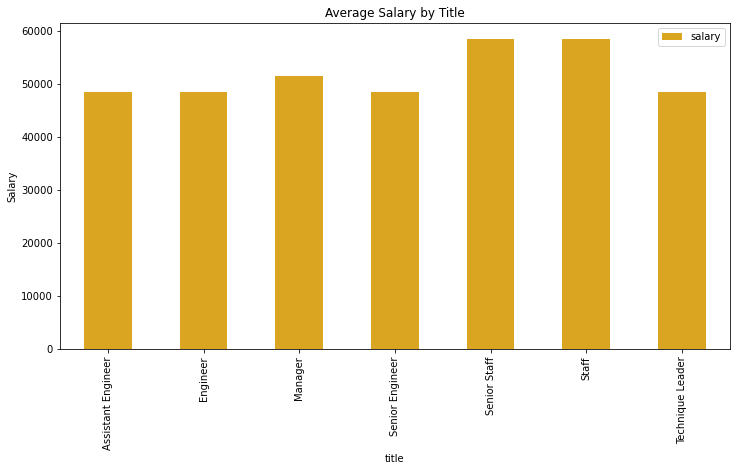

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a bar chart of average salary by title.
group_title = pd.DataFrame(df_new.groupby("title")["salary"].mean())
group_title.plot(kind="bar",color= "goldenrod",figsize=(12,6), )
plt.title("Average Salary by Title")
plt.ylabel("Salary")
plt.savefig("barchart.png")
plt.show()
plt.tight_layout()